In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#http://archive.ics.uci.edu/ml/datasets/credit+approval
#http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html
#https://www.kaggle.com/code/chandanabhatt/prediction-of-credit-approval
# Credit approval dataset
# $ Male          : num  1 1 0 0 0 0 1 0 0 0 ...
# $ Age           : chr  "58.67" "24.50" "27.83" "20.17" ...
# $ Debt          : num  4.46 0.5 1.54 5.62 4 ...
# $ Married       : chr  "u" "u" "u" "u" ...
# $ BankCustomer  : chr  "g" "g" "g" "g" ...
# $ EducationLevel: chr  "q" "q" "w" "w" ...
# $ Ethnicity     : chr  "h" "h" "v" "v" ...
# $ YearsEmployed : num  3.04 1.5 3.75 1.71 2.5 ...
# $ PriorDefault  : num  1 1 1 1 1 1 1 1 1 0 ...
# $ Employed      : num  1 0 1 0 0 0 0 0 0 0 ...
# $ CreditScore   : num  6 0 5 0 0 0 0 0 0 0 ...
# $ DriversLicense: chr  "f" "f" "t" "f" ...
# $ Citizen       : chr  "g" "g" "g" "s" ...
# $ ZipCode       : chr  "00043" "00280" "00100" "00120" ...
# $ Income        : num  560 824 3 0 0 ...
# $ Approved      : chr  "+" "+" "+" "+" ...

def load_credit_approval():
    df = pd.read_csv('data/credit-approval.data',sep=",")
    protected_attribute = 'Male'
    majority_group_name = "Female"
    minority_group_name = "Male"
    class_label = 'Approved'
    filename = "NB.credit_approval.abroca.png"
    
    df.head(5)
    #Remove missing value
    df = df[df['Male'] != '?']   
    #Label sex
    df['Male']=["Female" if v == "a" else "Male" for v in df['Male']]
    #Label class
    df['Approved']=[1 if v == "+" else 0 for v in df['Approved']]
    
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
#Credit card client
#Gender (1 = male; 2 = female)
def load_credit_card():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'default payment'
    filename = "NB.credit_card.abroca.png"   
    
    #Label sex
    df['SEX']=["Female" if v == 2 else "Male" for v in df['SEX']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
#German credit
def load_german_credit():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "male"
    minority_group_name = "female"
    class_label = 'class-label'
    filename = "NB.german_credit.abroca.png"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [15]:
X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name = load_german_credit()
X_train['sex'].head()

541    1
440    1
482    0
422    1
778    1
Name: sex, dtype: int64

In [5]:
def load_PAKDD2010():
    df = pd.read_csv('data/PAKDD.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'TARGET_LABEL_BAD'
    filename = "NB.PAKDD.abroca.png"    
    
    #Remove ID
    df=df.drop(columns=['ID_CLIENT'])
    df =df.dropna()
    df=df.drop(columns = ['RESIDENCIAL_PHONE_AREA_CODE','RESIDENCIAL_ZIP_3','PROFESSIONAL_ZIP_3'])
    #Label sex
    df['SEX']=["Female" if v == "F" else "Male" for v in df['SEX']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
#Credit scoring data
#https://www.kaggle.com/code/islombekdavronov/credit-scoring
#FinTech companies in Central Asia.
def load_credit_scoring():
    df = pd.read_csv('data/credit_scoring.csv')    
    protected_attribute = 'Sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'label'
    filename = "NB.credit_scoring.abroca.png"    
    
    df = df.replace({'-':0})
    df['Score_point']=df['Score_point'].astype(float)
    #Label sex
    df['Sex']=["Female" if v == 2 else "Male" for v in df['Sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,1:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run GaussianNB model
    NB = GaussianNB()
    NB.fit(X_train,y_train)
    y_predicts = NB.predict(X_test)
    y_pred_probs = NB.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = NB.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [8]:
#Main function
def run_eval(dataset):
    if dataset == 'credit-approval':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_approval()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'credit-card':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_card()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'german-credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'PAKDD':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_PAKDD2010()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'credit-scoring':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_scoring()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.7628654970760234, 'accuracy': 0.7794117647058824, 'f1-score': 0.7133757961783439, 'fairness': 0.05301604869950194}
Equal opportunity
{'balanced_accuracy': 0.7628654970760234, 'accuracy': 0.7794117647058824, 'f1-score': 0.7133757961783439, 'fairness': 0.06370192307692313, 'TPR_protected': 0.5769230769230769, 'TPR_non_protected': 0.640625, 'TNR_protected': 0.8974358974358975, 'TNR_non_protected': 0.9066666666666666}
Equalized odds
{'balanced_accuracy': 0.7628654970760234, 'accuracy': 0.7794117647058824, 'f1-score': 0.7133757961783439, 'fairness': 0.07293269230769228, 'TPR_protected': 0.5769230769230769, 'TPR_non_protected': 0.640625, 'TNR_protected': 0.8974358974358975, 'TNR_non_protected': 0.9066666666666666}
Predictive parity
{'balanced_accuracy': 0.7628654970760234, 'accuracy': 0.7794117647058824, 'f1-score': 0.7133757961783439, 'fairness': 0.0646929824561403, 'TPR_protected': 0.5769230769230769, 'TPR_non_protected': 0.640625, 'TNR_protected

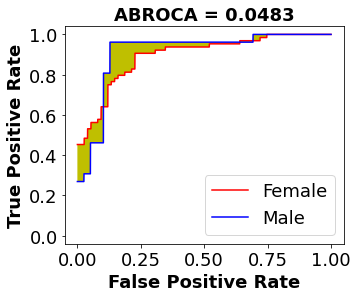

ABROCA: 0.048257820578755085


In [9]:
run_eval('credit-approval')

Statistical parity:
{'balanced_accuracy': 0.5599344851576995, 'accuracy': 0.37777777777777777, 'f1-score': 0.38189845474613693, 'fairness': -0.0034529790576820485}
Equal opportunity
{'balanced_accuracy': 0.5599344851576995, 'accuracy': 0.37777777777777777, 'f1-score': 0.38189845474613693, 'fairness': 0.030875368164088424, 'TPR_protected': 0.8959641255605382, 'TPR_non_protected': 0.8650887573964497, 'TNR_protected': 0.23730400187222092, 'TNR_non_protected': 0.23707986989519336}
Equalized odds
{'balanced_accuracy': 0.5599344851576995, 'accuracy': 0.37777777777777777, 'f1-score': 0.38189845474613693, 'fairness': 0.031099500141115982, 'TPR_protected': 0.8959641255605382, 'TPR_non_protected': 0.8650887573964497, 'TNR_protected': 0.23730400187222092, 'TNR_non_protected': 0.23707986989519336}
Predictive parity
{'balanced_accuracy': 0.5599344851576995, 'accuracy': 0.37777777777777777, 'f1-score': 0.38189845474613693, 'fairness': 0.022596038950070868, 'TPR_protected': 0.8959641255605382, 'TPR_n

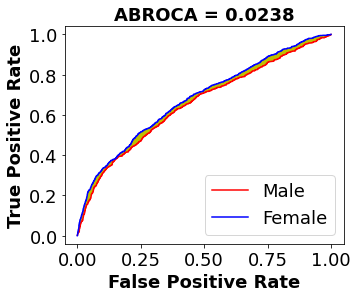

ABROCA: 0.02377930178083963


In [10]:
run_eval('credit-card')

Statistical parity:
{'balanced_accuracy': 0.6604185288395815, 'accuracy': 0.73, 'f1-score': 0.8120649651972159, 'fairness': 0.0019296740994854122}
Equal opportunity
{'balanced_accuracy': 0.6604185288395815, 'accuracy': 0.73, 'f1-score': 0.8120649651972159, 'fairness': 0.06135593220338986, 'TPR_protected': 0.8813559322033898, 'TPR_non_protected': 0.82, 'TNR_protected': 0.5517241379310345, 'TNR_non_protected': 0.45161290322580644}
Equalized odds
{'balanced_accuracy': 0.6604185288395815, 'accuracy': 0.73, 'f1-score': 0.8120649651972159, 'fairness': 0.1614671669086179, 'TPR_protected': 0.8813559322033898, 'TPR_non_protected': 0.82, 'TNR_protected': 0.5517241379310345, 'TNR_non_protected': 0.45161290322580644}
Predictive parity
{'balanced_accuracy': 0.6604185288395815, 'accuracy': 0.73, 'f1-score': 0.8120649651972159, 'fairness': 0.016560509554140124, 'TPR_protected': 0.8813559322033898, 'TPR_non_protected': 0.82, 'TNR_protected': 0.5517241379310345, 'TNR_non_protected': 0.45161290322580644

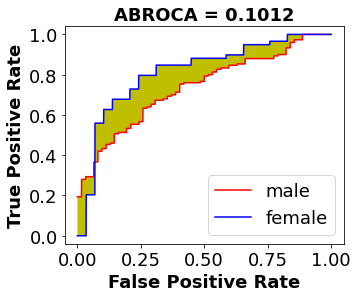

ABROCA: 0.10122308997685432


In [11]:
run_eval('german-credit')

Statistical parity:
{'balanced_accuracy': 0.5088497722197949, 'accuracy': 0.7255977375953381, 'f1-score': 0.08514285714285713, 'fairness': 0.0021843320033880093}
Equal opportunity
{'balanced_accuracy': 0.5088497722197949, 'accuracy': 0.7255977375953381, 'f1-score': 0.08514285714285713, 'fairness': 0.008681929221523228, 'TPR_protected': 0.05181918412348401, 'TPR_non_protected': 0.043137254901960784, 'TNR_protected': 0.9715844937899887, 'TNR_non_protected': 0.9660134721371708}
Equalized odds
{'balanced_accuracy': 0.5088497722197949, 'accuracy': 0.7255977375953381, 'f1-score': 0.08514285714285713, 'fairness': 0.014252950874341093, 'TPR_protected': 0.05181918412348401, 'TPR_non_protected': 0.043137254901960784, 'TNR_protected': 0.9715844937899887, 'TNR_non_protected': 0.9660134721371708}
Predictive parity
{'balanced_accuracy': 0.5088497722197949, 'accuracy': 0.7255977375953381, 'f1-score': 0.08514285714285713, 'fairness': 0.052348168182935806, 'TPR_protected': 0.05181918412348401, 'TPR_non

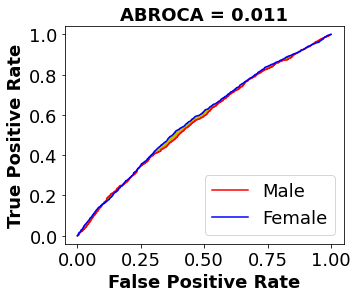

ABROCA: 0.01097816825640374


In [12]:
run_eval('PAKDD')

Statistical parity:
{'balanced_accuracy': 0.8785277760579231, 'accuracy': 0.9585078035782261, 'f1-score': 0.977229997911009, 'fairness': 0.04483669861356665}
Equal opportunity
{'balanced_accuracy': 0.8785277760579231, 'accuracy': 0.9585078035782261, 'f1-score': 0.977229997911009, 'fairness': 0.014894545261272762, 'TPR_protected': 0.9697377269670477, 'TPR_non_protected': 0.9846322722283205, 'TNR_protected': 0.8098159509202454, 'TNR_non_protected': 0.7121212121212122}
Equalized odds
{'balanced_accuracy': 0.8785277760579231, 'accuracy': 0.9585078035782261, 'f1-score': 0.977229997911009, 'fairness': 0.112589284060306, 'TPR_protected': 0.9697377269670477, 'TPR_non_protected': 0.9846322722283205, 'TNR_protected': 0.8098159509202454, 'TNR_non_protected': 0.7121212121212122}
Predictive parity
{'balanced_accuracy': 0.8785277760579231, 'accuracy': 0.9585078035782261, 'f1-score': 0.977229997911009, 'fairness': 0.0003031273253349953, 'TPR_protected': 0.9697377269670477, 'TPR_non_protected': 0.9846

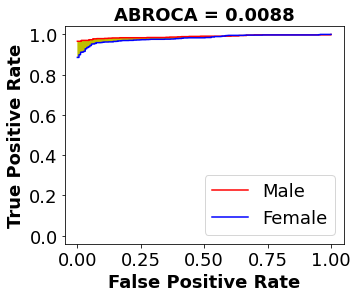

ABROCA: 0.00884640682084464


In [13]:
run_eval('credit-scoring')